In [2]:
#@title imports
import os
import pickle
from typing import Set
import sys 
sys.path.append('C:/Users/Nishant Joshi/Downloads/Old_code/repo/single_cell_analysis/scripts')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.function_base import append
import scipy.io as spio
from scipy.io import loadmat, savemat
import importlib.util
from sklearn import datasets, linear_model
import matplotlib.pyplot as pltt
from scipy.sparse import data
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import SparsePCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from utils import *


In [55]:
path = 'D:/Analyzed/' #'D:/Analyzed/'
path_save = 'D:/spike_shapes/'
all_fn = os.listdir(path)

# for i,f in enumerate(all_fn):
#     data = loadmatInPy(path+f)
#     print(i, f)
#     count=0
#     for data_i in data:
#         fig,ax = plt.subplots(1,2,figsize=[8,4])
#         count+=1
#         f_save = f.split('_analyzed')[0]
#         spike = data_i['membrane_potential'][data_i['spikeindices'][0]-50:data_i['spikeindices'][0]+50]
#         # plt.plot(spike)
#         ax[0].plot(spike[:-1],np.diff(spike))
#         ax[1].plot(np.diff(spike))

#         # plt.savefig(path_save+f_save+str(count)+'.png')
#         plt.show()
#         # plt.show()
# all_fn
data = loadmatInPy(path+'xuan_20-11-18_E3_analyzed.mat') 
# all_fn     

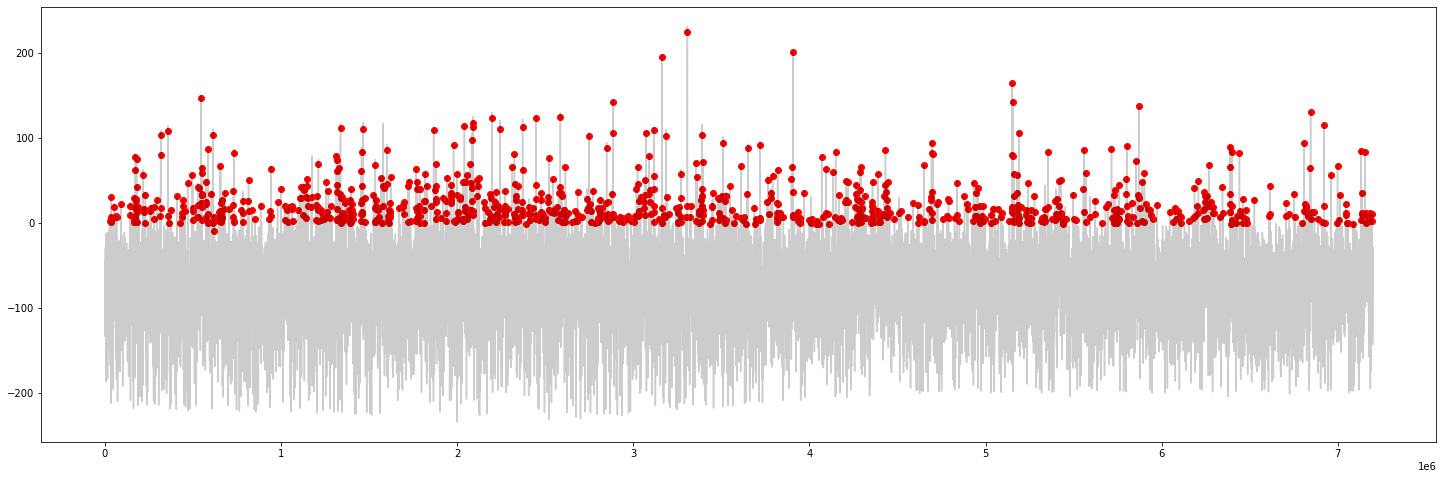

In [56]:
data_i = data[1]

plt.figure(figsize=[25,8]) #[int(2e6):int(2.2e6)]
plt.plot(data_i['membrane_potential'],c='k',alpha=0.2)
plt.scatter(data_i['spikeindices'],data_i['membrane_potential'][data_i['spikeindices']],c="r")

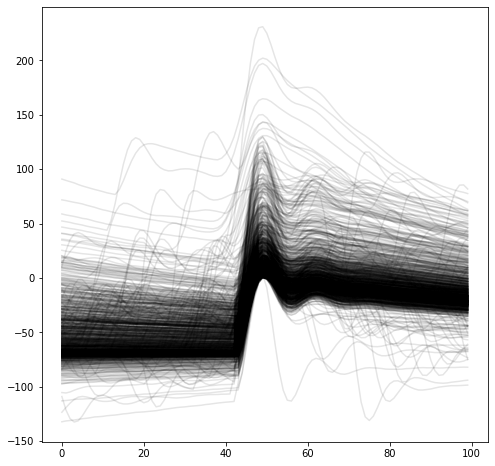

In [57]:
plt.figure(figsize=[8,8])
for i in range(len(data_i['spikeindices'])):
    spike = data_i['membrane_potential'][data_i['spikeindices'][i]-50:data_i['spikeindices'][i]+50]
    plt.plot((spike),c='k',alpha=.1)

In [4]:
data_c1 = loadmatInPy('G:/My Drive/Analyzed/'+'asli_1-18-7-19_E1'+'_analyzed.mat')

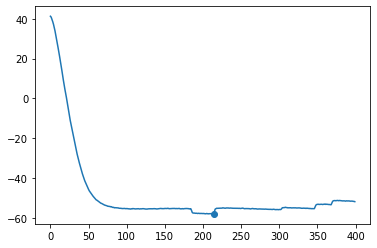

In [988]:
plt.plot(data_c1[0]['membrane_potential'][data_c1[0]['spikeindices'][0]:data_c1[0]['spikeindices'][0]+400])
ahp = np.argmin(data_c1[0]['membrane_potential'][data_c1[0]['spikeindices'][0]:data_c1[0]['spikeindices'][0]+400])
plt.scatter(ahp,data_c1[0]['membrane_potential'][data_c1[0]['spikeindices'][0]:data_c1[0]['spikeindices'][0]+400][ahp])

In [86]:
data = data_c1[0]
divisions = 36
total_duration = len(data['membrane_potential'])/20
time_ranges = np.arange(0,total_duration+1,total_duration//divisions)
spike_times = data['spikeindices']/20
time_divided_spiketimes = [np.array(spike_times[np.where(np.logical_and(spike_times>time_ranges[i],spike_times<=time_ranges[i+1] ))[0]]*20,dtype=np.int32)
for i in range(len(time_ranges)-1)]
thrs_divided_by_time = []
quantity = data['thresholds']
for i in time_divided_spiketimes:
    thrs_divided_by_time.append(quantity[last:last+len(i)])
    last = len(i)


NameError: name 'last' is not defined

<ipython-input-120-97c8a0d0042f>:25: RuntimeWarning: Mean of empty slice
  thrs =[np.nanmean(i) for i in return_thrs_divided_by_time(data_c1[0],36,data_c1[0]['thresholds'])]
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Nishant Joshi\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


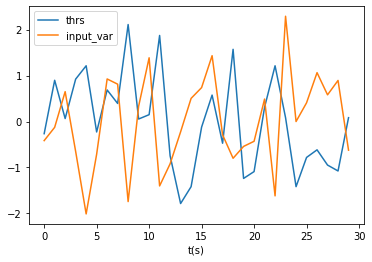

In [120]:
def return_thrs_divided_by_time(data,divisions,quant):
    total_duration = len(data['membrane_potential'])/20
    quantity = quant
    time_ranges = np.arange(0,total_duration+1,total_duration//divisions)
    spike_times = data['spikeindices']/20
    time_divided_spiketimes = [np.array(spike_times[np.where(np.logical_and(spike_times>time_ranges[i],spike_times<=time_ranges[i+1] ))[0]]*20,dtype=np.int32)
    for i in range(len(time_ranges)-1)]
    
    last = 0
    thrs_divided_by_time = []
    for i in time_divided_spiketimes:
        thrs_divided_by_time.append(quantity[last:last+len(i)])
        last = len(i)
    return thrs_divided_by_time  
def fr(data,divisions):
    total_duration = len(data['membrane_potential'])/20
    time_ranges = np.arange(0,total_duration+1,total_duration//divisions)
    spike_times = data['spikeindices']/20
    time_divided_spiketimes = [np.array(spike_times[np.where(np.logical_and(spike_times>time_ranges[i],spike_times<=time_ranges[i+1] ))[0]]*20,dtype=np.int32)
    for i in range(len(time_ranges)-1)]

    return [len(i)/((total_duration)//10) for i in time_divided_spiketimes]    

return_thrs_divided_by_time(data_c1[0],36,data_c1[0]['thresholds'])  
thrs =[np.nanmean(i) for i in return_thrs_divided_by_time(data_c1[0],36,data_c1[0]['thresholds'])]
isi = np.diff((data_c1[0]['spikeindices']/20))
isi_adap =[np.mean(i) for i in return_thrs_divided_by_time(data_c1[0],36,isi)]

plt.plot(np.arange(len((thrs[:30]-np.mean(thrs[:30]))/np.std(thrs[:30]))),(thrs[:30]-np.mean(thrs[:30]))/np.std(thrs[:30]))
plt.plot(np.arange(len((var[:30]-np.mean(var[:30]))/np.std(var[:30]))),(var[:30]-np.mean(var[:30]))/np.std(var[:30]))
# plt.plot((isi_adap-np.mean(isi_adap))/np.std(isi_adap))

# plt.plot((np.hstack(rate.magnitude)-np.mean(np.hstack(rate.magnitude)))/np.std(np.hstack(rate.magnitude)))  
plt.xlabel('t(s)')
plt.legend(['thrs','input_var','isi','firing_rate_cont'])
plt.show()


In [3]:

from elephant.statistics import isi, cv
# cv(isi(data_c1[0]['spikeindices']/20))
np.std(isi(data_c1[0]['spikeindices']/20))/np.mean(isi(data_c1[0]['spikeindices']/20))

1.2234543193249048

[41357.45901639344, 39919.81967213115, 34769.354838709674]


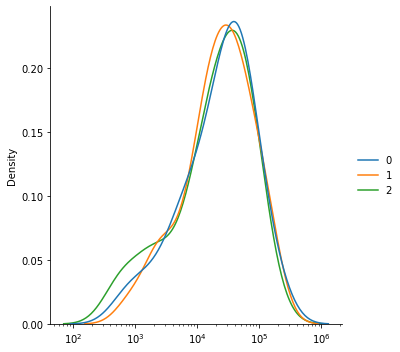

[21205.325, 18256.925, 20044.75]


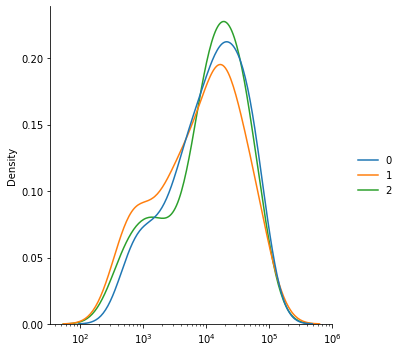

[36084.016393442624, 43204.688524590165, 36768.967741935485]


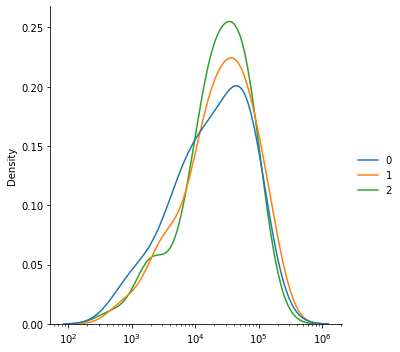

[17006.9406779661, 22008.43220338983, 21294.949152542373]


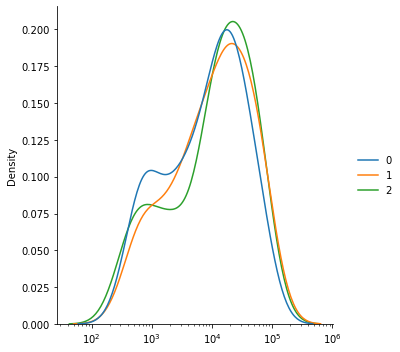

In [966]:
for i in range(len(data_c1)):
    isi = np.diff(data_c1[i]['spikeindices'])
    # fig,ax = plt.subplots()
    sns.displot([isi[:len(isi)//3],isi[len(isi)//3:2*len(isi)//3],isi[2*len(isi)//3:]], kind="kde",log_scale=True)
    print([np.mean(isi[:len(isi)//3]),np.mean(isi[len(isi)//3:2*len(isi)//3]),np.mean(isi[2*len(isi)//3:])])
    plt.show()

In [4]:
from elephant import sta
data  = data_c1[0]
spks = data['spikeindices']*(1/20000)
V = data['membrane_potential']
I = data['input_current']
# def plot_firing_rate(spks,V,sampling_rate,sampling_period,gaussian_kernel_std):
sampling_rate = 1/20000
sampling_period = 0.1
gaussian_kernel_std = 0.5
spiketrain = neo.SpikeTrain(spks, t_stop=len(V)*(sampling_rate), units='s')
signal = neo.AnalogSignal(np.array([I]).T, units='pA',
                               sampling_rate=20/ms) 
sta = sta.spike_triggered_average(signal, spiketrain, (-10 * ms, 0 * ms))
plt.plot(sta.magnitude)

NameError: name 'neo' is not defined

In [302]:
for i in range(len(data_c1)):
    print(np.mean(data_c1[i]['input_current'][2:]),np.var(data_c1[i]['input_current'][2:]))

-16.97747327558203 15491.8519921617
8.022526724417949 15491.8519921617
8.022526724417949 15491.8519921617


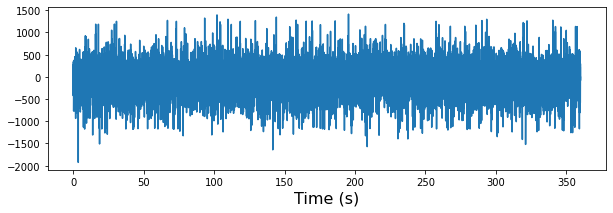

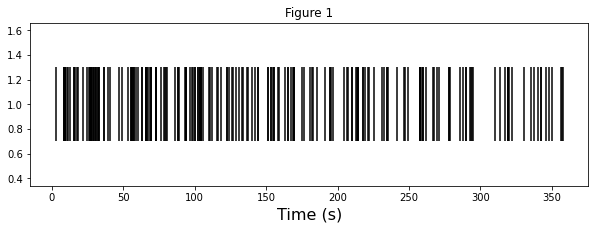

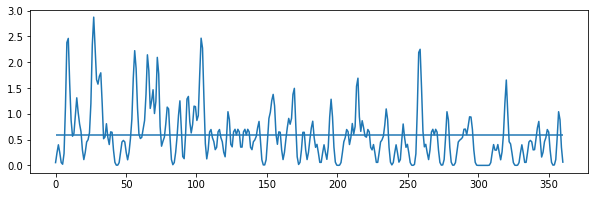

In [5]:
import neo
import quantities as pq
from quantities import *
from elephant import statistics
from elephant.statistics import time_histogram, instantaneous_rate

from elephant.kernels import GaussianKernel

data  = data_c1[0]
spks = data['spikeindices']*(1/20000)
V = data['membrane_potential']
I = data['input_current']
# def plot_firing_rate(spks,V,sampling_rate,sampling_period,gaussian_kernel_std):
sampling_rate = 1/20000
sampling_period = 1
gaussian_kernel_std = 1
spiketrain = neo.SpikeTrain(spks, t_stop=len(V)*(sampling_rate), units='s')
rate = instantaneous_rate(spiketrain, sampling_period=sampling_period*s, kernel=GaussianKernel(gaussian_kernel_std*s))
plt.figure(figsize=(10, 3))
plt.plot(np.linspace(0,len(V)*(sampling_rate),len(I)),I)
plt.xlabel('Time (s)', fontsize=16)
plt.figure(figsize=(10, 3))
plt.eventplot([spiketrain.magnitude], linelengths=0.6, color='black')
plt.xlabel('Time (s)', fontsize=16)
plt.title("Figure 1")
plt.figure(figsize=(10, 3))
plt.hlines(np.mean(rate.magnitude),0,len(V)*(sampling_rate))
plt.plot(np.linspace(0,len(V)*(sampling_rate),len(np.hstack(rate.magnitude))),(np.hstack(rate.magnitude)))  


In [2]:
len(spks)/(len(V)*(1/20000))

NameError: name 'spks' is not defined

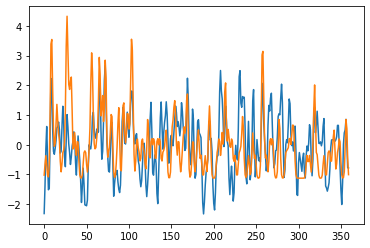

In [150]:
def return_variance_shift(data,shift,window):
    shift = 1000*20 
    window = 1000*20
    run =True
    start = 0
    means = []
    var = [] 
    while run:
        if start+window>len(data):
            run=False
        else:
            I_samp = data[start:(start+window)]
            means.append(np.mean(I_samp))
            var.append(np.var(I_samp))
            start+=shift
    return means,var
mean, var = return_variance_shift(I,100,100)

from scipy.ndimage import gaussian_filter
def z_score(data):
    return (data -np.mean(data))/np.std(data)
plt.plot(z_score(gaussian_filter(var, sigma=1)))
plt.plot(z_score(rate))

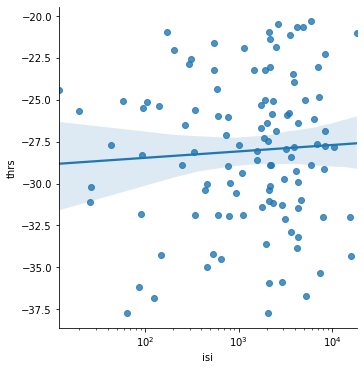

In [297]:
thrs = data_c1[1]['thresholds']
inds = ~np.isnan(thrs)
thrs = thrs[inds]
spikes = data_c1[1]['spikeindices']/20
isi = np.diff(spikes)
isi = isi[inds[:-1]]
df = pd.DataFrame({'thrs':thrs[:-1],'isi':isi})


from scipy import stats
X = np.array(df['isi'])
y = np.array(df['thrs'])
# res = stats.linregress(X, y)
# y_ = res[0]*X+res[1]
# # plt.scatter(df['isi'],df['thrs'])
# plt.plot(X,y_)
# plt.xscale('log')



sns.lmplot(x='isi', y="thrs", data=df,logx=True);
plt.xscale('log')



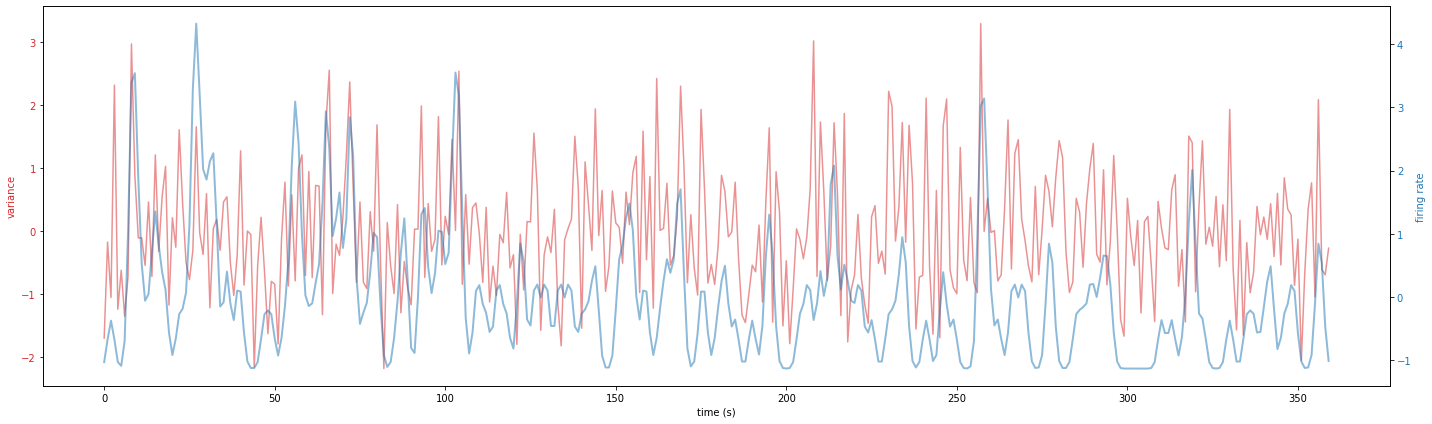

In [286]:
data1 = ((var-np.mean(var))/np.std(var))
data2 = np.hstack((rate.magnitude-np.mean(rate.magnitude))/np.std(rate.magnitude))

fig, ax1 = plt.subplots(figsize=[20,6])

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('variance', color=color)
ax1.plot( data1, color=color,alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('firing rate', color=color)  # we already handled the x-label with ax1
ax2.plot( data2, color=color,alpha=0.5,linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.show()

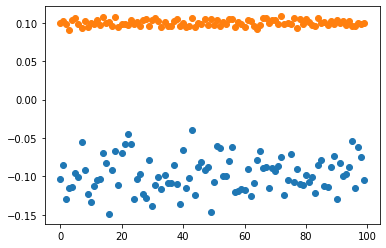

In [671]:
sns.displot([data_])

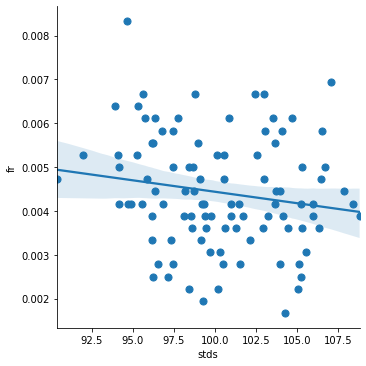

In [646]:
df = pd.DataFrame({'means':means,'stds':stds,'fr':np.hstack(df['fr'])})
# df = df.sort_values('stds')

sns.lmplot(x="stds", y="fr", data=df, x_estimator=np.mean);



In [648]:
np.argmax(df['stds'])
df

,means,stds,fr
0,-38.699961,99.445024,0.003611
1,-31.836807,103.054724,0.005833
2,-48.503321,98.430788,0.002222
3,-43.037444,90.361643,0.004722
4,-42.645943,104.308913,0.001667
...,...,...,...
95,-20.050684,95.656255,0.006667
96,-43.139402,95.857191,0.004722
97,-23.159328,100.570479,0.004722
98,-27.898986,98.164359,0.004444


In [551]:
spiketrain = neo.SpikeTrain(spks, t_stop=len(V)*(1/20), units='ms')
rate = instantaneous_rate(spiketrain, sampling_period=100*ms, kernel=GaussianKernel(5000*ms))


(216000, 288000)

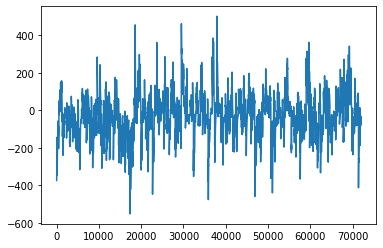

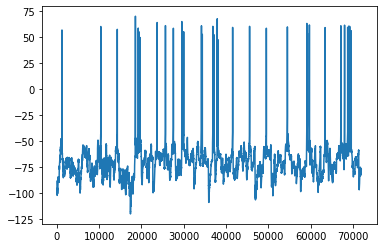

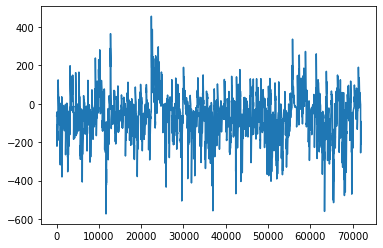

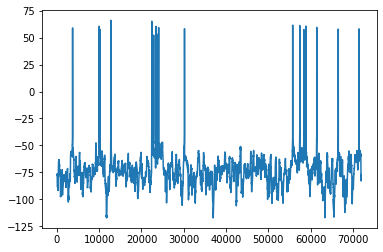

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


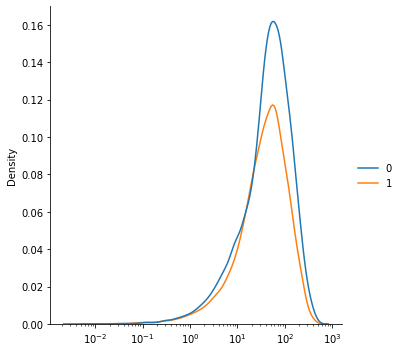

In [649]:
i_1 = 15
i_2 = 16
plt.plot(I[i_1*factor:(i_1+1)*factor])
plt.show()
plt.plot(V[i_1*factor:(i_1+1)*factor])
plt.show()
plt.plot(I[i_2*factor:(i_2+1)*factor])
plt.show()
plt.plot(V[i_2*factor:(i_2+1)*factor])
plt.show()
sns.displot([I[i_1*factor:(i_1+1)*factor],I[i_2*factor:(i_2+1)*factor]],kind='kde',log_scale=True)

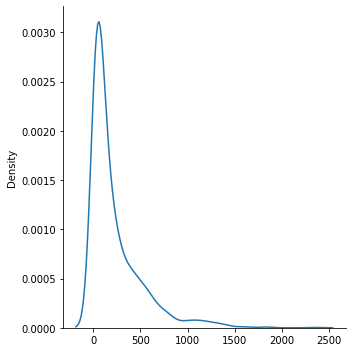

In [498]:
sns.displot(np.diff(data['spikeindices']*(1/20)),kind='kde')

c:\Users\Nishant Joshi\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


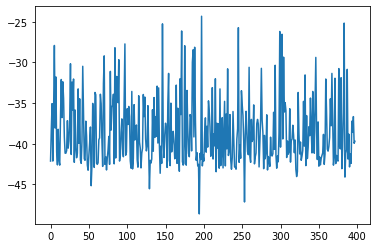

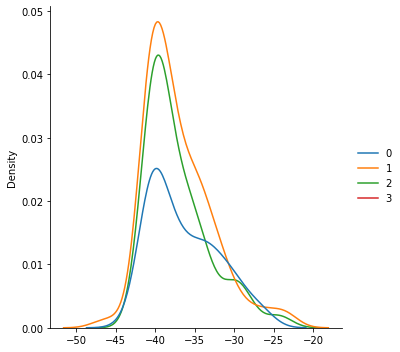

In [337]:
thrs = data_c1[0]['thresholds'][~np.isnan(data_c1[0]['thresholds'])]
plt.plot(thrs-np.mean(thrs)/np.max(thrs))
sns.displot([thrs[:len(thrs)//4],thrs[len(thrs)//4:2*len(thrs)//3],thrs[2*len(thrs)//3:3*len(thrs)//3],thrs[3*len(thrs)//3:]],kind='kde')


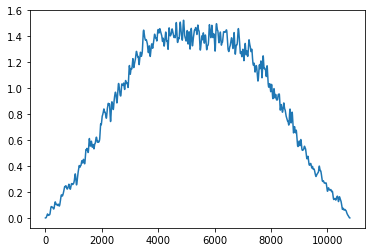

In [318]:
from scipy import signal
corr = signal.correlate(I,np.hstack(rate.magnitude)) /len(I)
plt.plot(corr)

In [57]:
a = np.arange(1,10)
print(np.mean(1/a))
print(1/np.mean(a))

0.31432980599647264
0.2


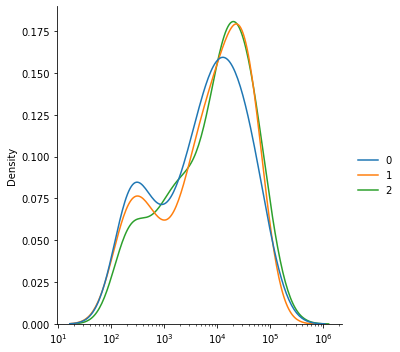

In [338]:
isi = np.diff(data_c1[0]['spikeindices'][~np.isnan(data_c1[0]['spikeindices'])])
# plt.plot(isi-np.mean(1isi)/np.max(isi))
sns.displot([isi[:len(isi)//3],isi[len(isi)//3:2*len(isi)//3],isi[2*len(isi)//3:]],kind='kde',log_scale=True)


<Axes: ylabel='Count'>

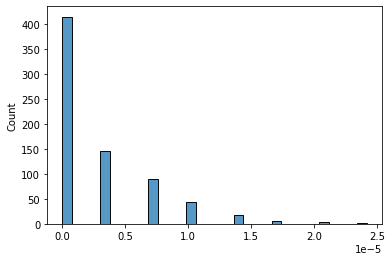

In [247]:
from elephant.statistics import time_histogram, instantaneous_rate
from elephant.statistics import mean_firing_rate
from quantities import ms, s, Hz

histogram_rate = time_histogram(spiketrain, 50*pq.ms, output='rate')
# print('times:', histogram_rate.times)
# print('rate:', histogram_rate.T[0])
sns.histplot(histogram_rate.T[0])

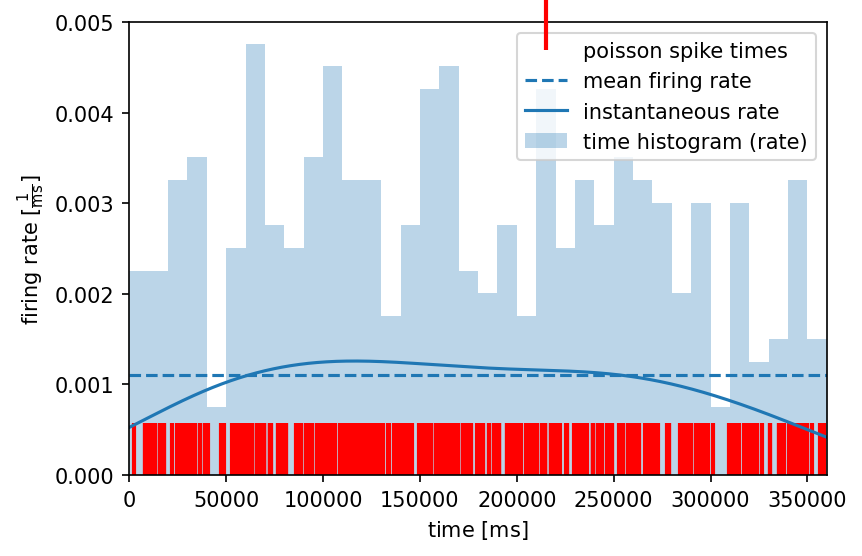

In [339]:
plt.figure(dpi=150)
inst_rate = instantaneous_rate(spiketrain, sampling_period=50*pq.ms)
histogram_rate = time_histogram(spiketrain, 10000*pq.ms, output='rate')

# plotting the original spiketrain
plt.plot(spiketrain, [0]*len(spiketrain), 'r', marker=2, ms=25, markeredgewidth=2, lw=0, label='poisson spike times')

# mean firing rate
plt.hlines(mean_firing_rate(spiketrain), xmin=spiketrain.t_start, xmax=spiketrain.t_stop, linestyle='--', label='mean firing rate')

# time histogram
plt.bar(histogram_rate.times, histogram_rate.magnitude.flatten()*1e3, width=histogram_rate.sampling_period, align='edge', alpha=0.3, label='time histogram (rate)')
# instantaneous rate
plt.plot(inst_rate.times.rescale(ms), inst_rate.rescale(histogram_rate.dimensionality).magnitude.flatten(), label='instantaneous rate')

# axis labels and legend
plt.xlabel('time [{}]'.format(spiketrain.times.dimensionality.latex))
plt.ylabel('firing rate [{}]'.format(histogram_rate.dimensionality.latex))
plt.xlim(spiketrain.t_start, spiketrain.t_stop)
plt.legend()
plt.show()

<BarContainer object of 36 artists>

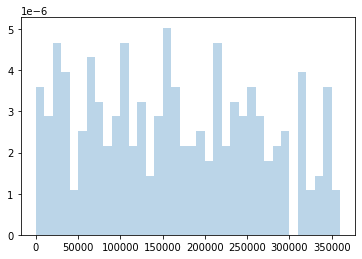

In [259]:
histogram_rate = time_histogram(spiketrain, 10000*pq.ms, output='rate')

plt.bar(histogram_rate.times, histogram_rate.magnitude.flatten(), width=histogram_rate.sampling_period, align='edge', alpha=0.3, label='time histogram (rate)')


In [344]:
# I = data_c1[0]['input_current']
# sns.displot([I[:len(I)//3],I[len(I)//3:2*len(I)//3],I[2*len(I)//3:]],kind='kde',log_scale=True)
print([np.std(I[:len(I)//3]),np.std(I[len(I)//3:2*len(I)//3]),np.std(I[2*len(I)//3:])])

[123.57162518460804, 125.0594649923362, 124.75789558703049]


[1.6496341313305645, 1.6726811462769156, 1.5292045797167524]

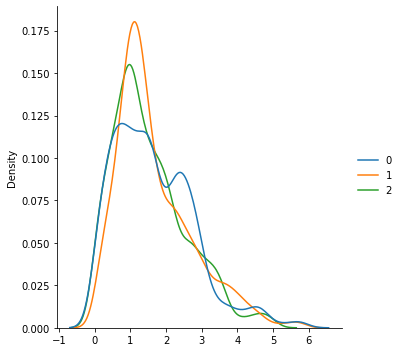

In [218]:
# I = data_c1[0]['input_current']
# sns.displot([I[:len(I)//3],I[len(I)//3:
# 
2*len(I)//3],I[2*len(I)//3:]],kind='kde',log_scale=True)
I = np.hstack(rate.magnitude)
sns.displot([I[:len(I)//3],I[len(I)//3:2*len(I)//3],I[2*len(I)//3:]],kind='kde',log_scale=False)

[np.mean(I[:len(I)//3]),np.mean(I[len(I)//3:2*len(I)//3]),np.mean(I[2*len(I)//3:])]

In [369]:
V = data_c1[0]['membrane_potential']*1e-3 # V
I = data_c1[0]['input_current']*1e-12 #pA
spks = data_c1[0]['spikeindices']
spks_tr =list(spks[(np.where(np.diff(spks)>4000)[0])])
spks_tr.append(spks[(np.where(np.diff(spks)>4000)[0][-1])+1])
V_zero  = np.zeros_like(V,dtype=bool)
dt  = 1/20000
t_window = .2/dt
indices = np.int64([np.hstack([np.arange(i,i+(t_window)) for i in spks_tr ])])
dvdt =  np.diff(V)/dt
V_zero[indices]=1
V_dyn = V[~V_zero]
I_dyn = I[~V_zero]
Vs = np.arange(-0.08,-0.05,0.001)
Cm_vs = []
# for i in Vs:
i = -0.075
V_wind = [i+0.001,i-0.001] #max-min
V_ =V_dyn[np.where(np.logical_and(V_dyn>=V_wind[1], V_dyn<=V_wind[0]))[0]] v
dv_dt = np.diff(V_)/(dt)
I_ =I_dyn[np.where(np.logical_and(V_dyn>=V_wind[1], V_dyn<=V_wind[0]))[0]]
Cms = np.logspace(-1,3,4000)*1e-12 # np.arange(0.5,200,0.1)
Var = [np.var(I_[:-1]/(cm) - dv_dt) for cm in Cms]
min_Cm = Cms[np.argmin(Var)]


9.456794156853661e-11

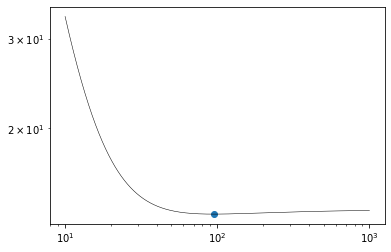

In [370]:
plt.loglog(Cms[2000:]/1e-12,Var[2000:],c='k',linewidth=0.5)
min_var = np.argmin(Var[2000:])
plt.scatter(Cms[2000:][min_var]/1e-12,Var[2000:][min_var])
min_Cm

In [432]:
Im = I_[:-1]-min_Cm*dv_dt
plt.plot(Im)
plt.show()
Vs = np.arange(-0.08,-0.02,0.001)
Ims = []
for i in Vs:
    V_wind = [i+0.005,i-0.005] 
    Vtemp =V[np.where(np.logical_and(V_dyn>=V_wind[1], V_dyn<=V_wind[0]))[0]]
    Im_temp = Im[np.where(np.logical_and(V[:-1]>=V_wind[1], V[:-1]<=V_wind[0]))[0]]
    Ims.append(Im_temp)

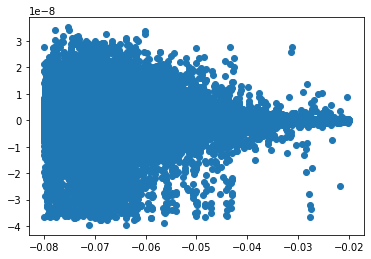

In [428]:
# Ic = [len(i) for i in Ims]
# Imeans = [np.mean(i) for i in Ims]
# for i in range(len(Vs)):
#   plt.scatter(i*np.ones(Ic[i]), Ims[i])
# plt.show() 

plt.scatter(V_dyn[np.where(np.logical_and(V_dyn>=-0.08, V_dyn<=-0.02))[0]],Im[np.where(np.logical_and(V_dyn>=-0.08, V_dyn<=-0.02))[0]])
